**Project - Data Exploration and Storytelling with Berlin Rentals**
The description:
This is our very familiar Berlin rentals dataset :)

The dataset:
The datasets contains information about rental appartments in Berlin. One row is for one appartment. The dataset contains 6 columns.

Region: is the Berlin district, where the flat is located
Condition: is the condition of the flat
Rooms: The number of rooms the flat has
Rent: Monthly rent for the flat
Year_Construction: The year in which the house was build
Space: How many square meters does the flat has?
The Task:
You want to find why some flats are more expensive than others. For this we will explore the different variables.

Have a look at the variables and formulate for every variable a hypothesis, how the variable affects the price of the flat. Example: "I believe flat in Mitte are more expensive than in Neukölln." or "I think the bigger the flat, the higher the price".
Create an analysis for every hypothesis. Show your conclusion with a plot.
Write a short conclusion to every hypothesis. every hypothesis.

In [1]:
# Imports
import pandas as pd
import seaborn as sns

# Get the dataset
rentals = pd.read_csv('https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv')

In [2]:
#what kind of information do we have
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             764 non-null    object 
 1   Condition          764 non-null    object 
 2   Rooms              764 non-null    float64
 3   Rent               764 non-null    float64
 4   Year_Construction  764 non-null    int64  
 5   Space              764 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 35.9+ KB


**Hypothesis 1: Apartments with bigger space cost more**

In [3]:
rentals.groupby('Space').agg({"Rent":["mean", "median", "max", "min"]})

Rent                              
            mean    median       max       min
Space                                         
14.00     450.00    450.00    450.00    450.00
18.00     436.50    436.50    475.00    398.00
19.00     715.00    715.00    715.00    715.00
19.22     622.00    622.00    622.00    622.00
20.00     699.00    699.00    699.00    699.00
...          ...       ...       ...       ...
274.00   9774.00   9774.00   9774.00   9774.00
286.84   6855.48   6855.48   6855.48   6855.48
300.00   5876.35   5876.35   5876.35   5876.35
324.00   5930.00   5930.00   5930.00   5930.00
413.91  14207.00  14207.00  14207.00  14207.00

[571 rows x 4 columns]

In [4]:
#is there a correlation between the space and rent paid for an apartment?
rentals["Space"].corr(rentals["Rent"])

0.855682835688456

<Axes: xlabel='Space', ylabel='Rent'>

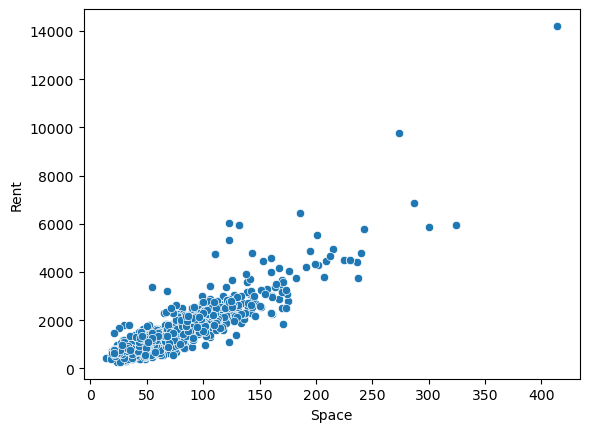

In [5]:
sns.scatterplot(data=rentals, x="Space", y="Rent")

Text(0, 0.5, 'Rent')

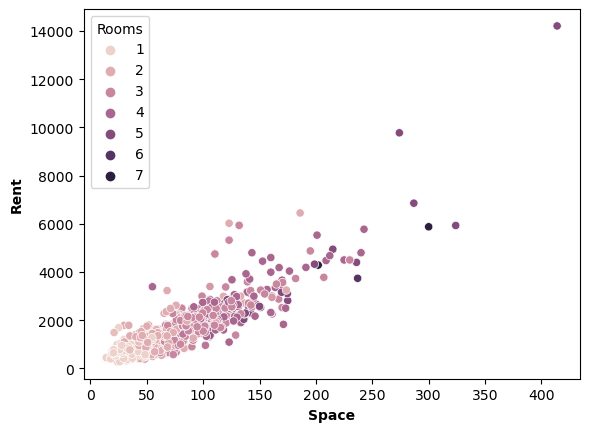

In [6]:
import matplotlib.pyplot as plt
sns.scatterplot(data = rentals, x="Space", y="Rent", hue = "Rooms")
plt.xlabel('Space', weight='bold')
plt.ylabel('Rent', weight='bold')

**Conclusion**

There is a strong positive correlation between space and rent paid for an apartment

The bigger the space, the higher the rent for that apartment



**Hypothesis 2: All one room apartments have a maximum space of 50 square meters and cost less**

In [7]:
rentals.query('Rooms == 1')["Space"].describe()

count    107.000000
mean      34.470748
std       12.729400
min       14.000000
25%       25.925000
50%       32.610000
75%       40.980000
max      109.000000
Name: Space, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.5'),
  Text(2, 0, '2.0'),
  Text(3, 0, '2.5'),
  Text(4, 0, '3.0'),
  Text(5, 0, '3.5'),
  Text(6, 0, '4.0'),
  Text(7, 0, '4.5'),
  Text(8, 0, '5.0'),
  Text(9, 0, '6.0'),
  Text(10, 0, '7.0')])

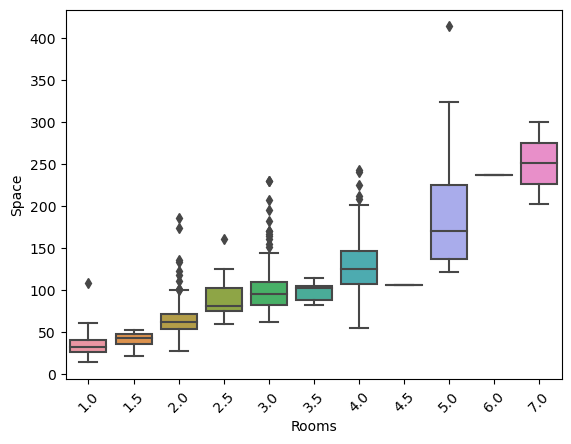

In [8]:
my_plot = sns.boxplot(data = rentals, x="Rooms", y="Space")
plt.xticks(rotation = 45)

In [9]:
rentals.query('Rooms == 1')["Space"].median()

32.61

In [10]:
rentals.query('Rooms == 1')["Space"].mode()

0    20.5
Name: Space, dtype: float64

In [11]:
#rent for one room apartments with less than 50 square metres of space
rentals.query('Rooms == 1 & Space < 50')["Rent"].describe()

count      97.000000
mean      790.276495
std       268.578568
min       271.250000
25%       620.000000
50%       780.000000
75%       969.000000
max      1690.000000
Name: Rent, dtype: float64

<Axes: xlabel='Rooms', ylabel='Rent'>

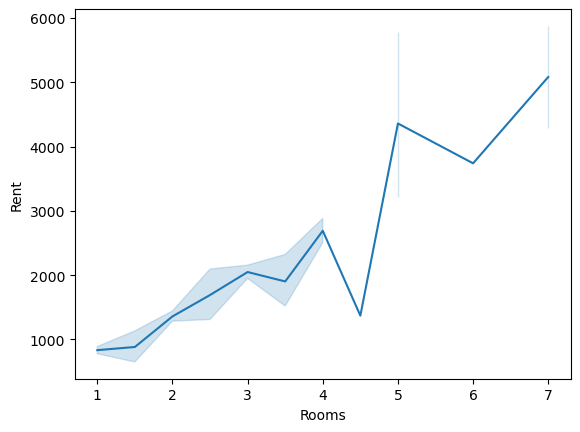

In [12]:
#rent increases with the number of rooms
sns.lineplot(data = rentals, y="Rent", x = "Rooms")

In [13]:
# one room apartments with more than 50 square metres of space
rentals.query('Rooms == 1 & Space > 50').value_counts()

Region           Condition                           Rooms  Rent     Year_Construction  Space 
Friedrichsfelde  first_time_use                      1.0    993.96   2020               50.33     1
Mitte            fully_renovated                     1.0    1200.00  2014               55.00     1
                 mint_condition                      1.0    1250.06  2015               52.24     1
                                                            1850.00  2009               109.00    1
                 well_kept                           1.0    924.44   2000               61.14     1
Neukölln         first_time_use                      1.0    891.65   1917               51.72     1
Prenzlauer       mint_condition                      1.0    1283.71  2016               54.59     1
                 no_information                      1.0    1395.00  1906               52.00     1
Tiergarten       fully_renovated                     1.0    1163.00  1990               52.85     1
Wilme

In [14]:
rentals.query('Rooms == 1 & Space > 50').describe()

,Rooms,Rent,Year_Construction,Space
count,10.0,10.000000,10.000000,10.000000
mean,1.0,1250.182000,1984.600000,59.387000
std,0.0,294.805125,42.547229,17.686207
min,1.0,891.650000,1906.000000,50.330000
25%,1.0,1036.220000,1966.750000,52.060000
50%,1.0,1225.030000,2004.500000,53.720000
75%,1.0,1367.177500,2014.750000,55.000000
max,1.0,1850.000000,2020.000000,109.000000


**Conclusion**

Not all one room apartments have a space of less than 50 square meters.

There are 10 one room apartments in rentals dataset with more than 50 square meters of space

The more the number of rooms, the higher the rent

**Hypothesis 3: Older Apartments are Cheaper than New Apartments**

In [15]:
#which years were the apartments constructed?
rentals.Year_Construction

0      2019
1      2020
2      1997
3      1900
4      2020
       ... 
759    2017
760    2017
761    2017
762    2017
763    1990
Name: Year_Construction, Length: 764, dtype: int64

In [16]:
rentals["Year_Construction"].mode()

0    2019
Name: Year_Construction, dtype: int64

In [17]:
rentals["Year_Construction"].describe()

count     764.000000
mean     1983.695026
std        48.006060
min      1864.000000
25%      1959.000000
50%      2015.000000
75%      2019.000000
max      2020.000000
Name: Year_Construction, dtype: float64

Most of the available apartments were constructed in 2019

The oldest and newest aparments were constructed in 1864 and 2020, respectively.

In [18]:
#are older apartments cheaper than new apartments?
rentals.groupby('Year_Construction').agg({"Rent":['mean', 'median', 'max', 'min']})

Rent                           
                          mean    median     max      min
Year_Construction                                        
1864               2199.000000  2199.000  2199.0  2199.00
1867               4400.000000  4400.000  4400.0  4400.00
1870               1650.624286  1590.350  2159.2  1454.18
1873               2708.000000  2708.000  2708.0  2708.00
1874               1399.000000  1399.000  1399.0  1399.00
...                        ...       ...     ...      ...
2016               1921.265714  1530.825  6450.0   719.56
2017               1423.684889  1180.000  3295.0   398.00
2018               2075.842414  1736.500  5936.4   610.00
2019               1937.523757  1869.560  6022.5   525.00
2020               1520.294655  1449.900  2862.0   776.47

[93 rows x 4 columns]

In [19]:
by_year = rentals.groupby('Year_Construction')["Rent"].mean()
by_year.head()

Year_Construction
1864    2199.000000
1867    4400.000000
1870    1650.624286
1873    2708.000000
1874    1399.000000
Name: Rent, dtype: float64

In [20]:
by_year.tail()

Year_Construction
2016    1921.265714
2017    1423.684889
2018    2075.842414
2019    1937.523757
2020    1520.294655
Name: Rent, dtype: float64

<Axes: xlabel='Year_Construction', ylabel='Rent'>

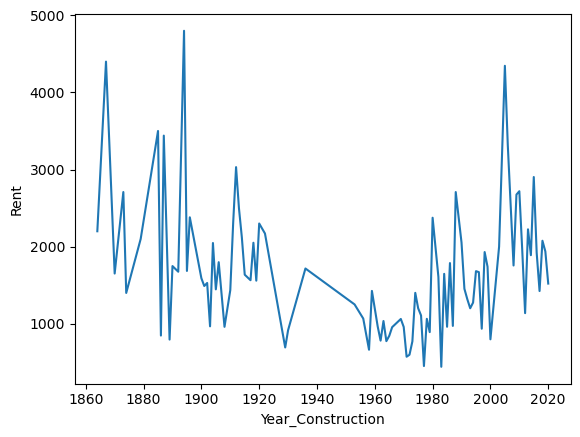

In [21]:
sns.lineplot(data = by_year)

<Axes: xlabel='Year_Construction', ylabel='Rent'>

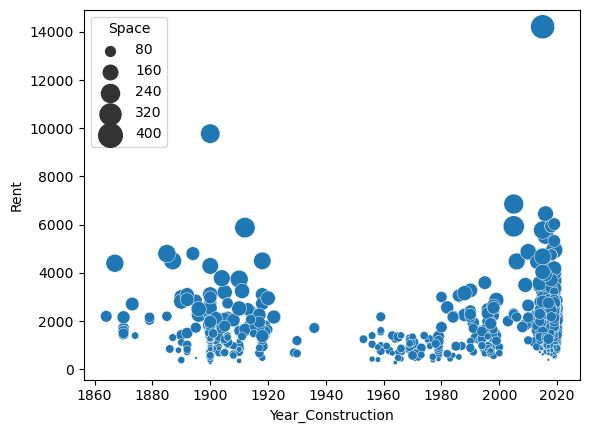

In [22]:
sns.scatterplot(data=rentals, x="Year_Construction", y="Rent", size = "Space", sizes=(1,300))

In [23]:
#is there a correlation between the year of construction and rent paid for an apartment?
rentals["Year_Construction"].corr(rentals["Rent"])

0.07885805357167582

**Conclusion**

Older apartments are not necessarily cheaper than newly built apartments

There is no correlation between the year a flat was built and the monthly rent paid for that apartment

**Hypothesis 4: Apartments are cheaper in Berlin Charlottenburg than in Tiergarten**

In [24]:
rentals.groupby("Region")["Rent"].describe().sort_values("mean", ascending = False)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Mitte,153.0,2408.725033,1543.059190,398.00,1533.0000,1959.00,2620.000,14207.00
Kreuzberg,47.0,2049.138085,1172.802355,435.74,1190.6500,1817.00,2577.695,6450.00
Prenzlauer,53.0,1996.962264,1088.544439,475.00,1294.0000,1639.52,2724.170,5930.00
Tiergarten,171.0,1914.824795,786.464690,271.25,1492.0000,1869.56,2281.990,4945.00
Charlottenburg,79.0,1753.452532,1125.786523,478.52,1200.0000,1498.00,2155.000,9774.00
Wilmersdorf,53.0,1748.646226,941.443278,404.39,1250.0000,1557.28,1980.000,5876.35
Neukölln,59.0,1188.114915,552.145415,379.95,708.5300,1055.43,1699.660,2295.00
Köpenick,55.0,1125.475818,390.822563,558.06,826.2450,969.00,1474.410,2159.20
Friedrichsfelde,52.0,1043.871731,403.402469,280.74,800.4625,971.00,1288.090,2138.68


C:\Users\ich\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Mitte'),
  Text(1, 0, 'Kreuzberg'),
  Text(2, 0, 'Köpenick'),
  Text(3, 0, 'Wilmersdorf'),
  Text(4, 0, 'Charlottenburg'),
  Text(5, 0, 'Friedrichsfelde'),
  Text(6, 0, 'Tiergarten'),
  Text(7, 0, 'Prenzlauer'),
  Text(8, 0, 'Wedding'),
  Text(9, 0, 'Neukölln')])

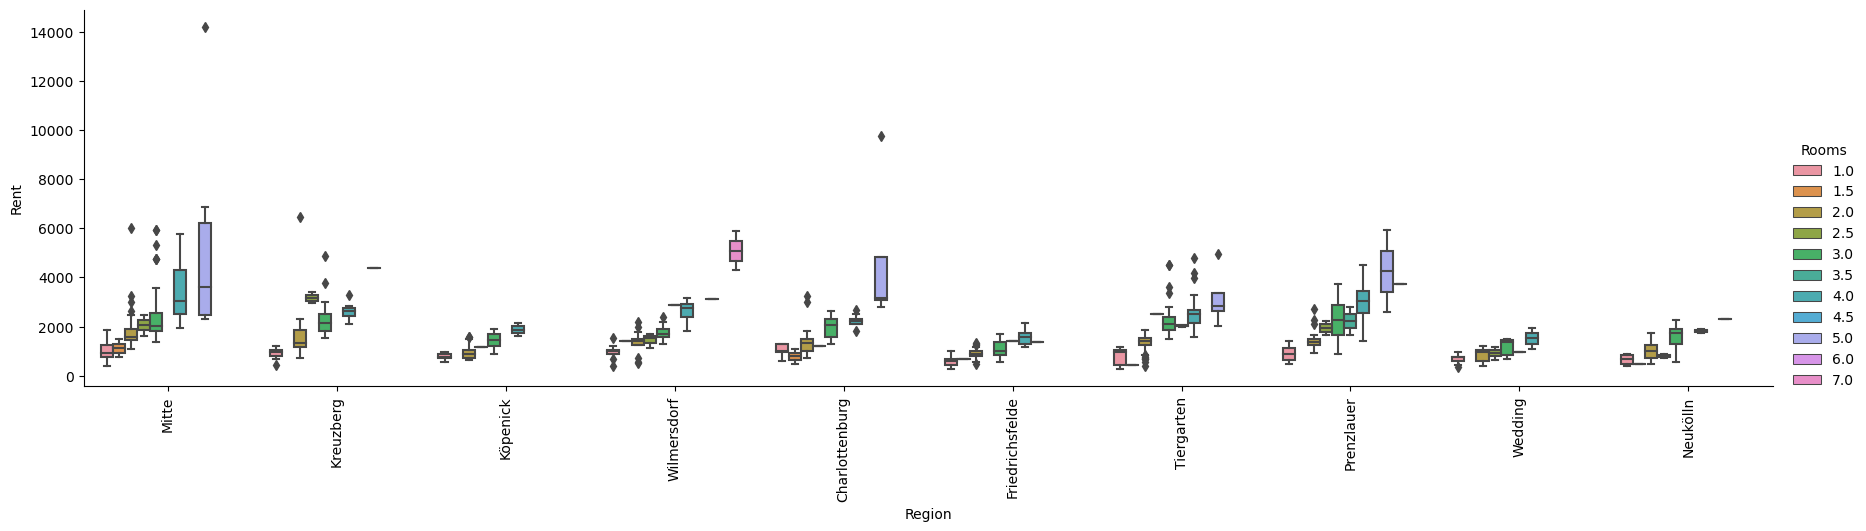

In [25]:
sns.catplot(x="Region", y="Rent", hue="Rooms", kind="box", data=rentals, height=4.5, aspect=4)
plt.xticks(rotation = 90)

C:\Users\ich\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Mitte'),
  Text(1, 0, 'Kreuzberg'),
  Text(2, 0, 'Köpenick'),
  Text(3, 0, 'Wilmersdorf'),
  Text(4, 0, 'Charlottenburg'),
  Text(5, 0, 'Friedrichsfelde'),
  Text(6, 0, 'Tiergarten'),
  Text(7, 0, 'Prenzlauer'),
  Text(8, 0, 'Wedding'),
  Text(9, 0, 'Neukölln')])

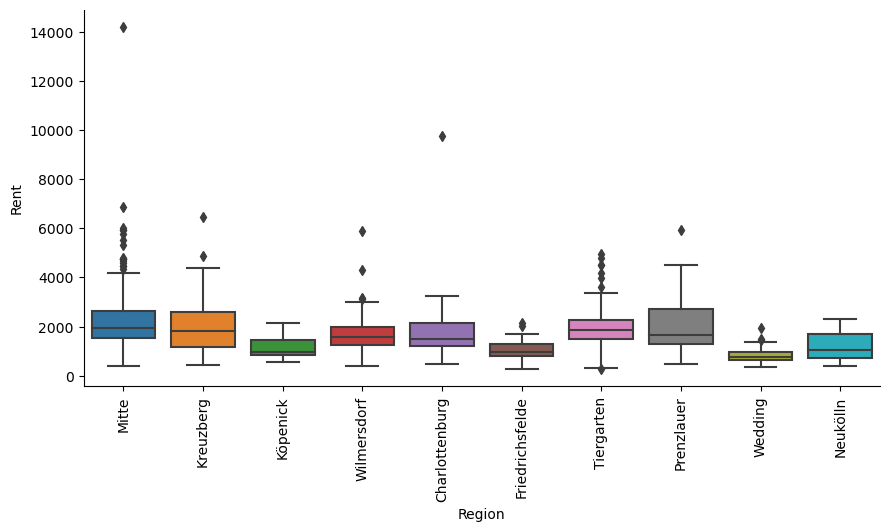

In [26]:
sns.catplot(x="Region", y="Rent", kind="box", data=rentals, height=4.5, aspect=2)
plt.xticks(rotation = 90)

In [27]:
cheaper_region = rentals.query('Region in["Tiergarten", "Charlottenburg"]')

<Axes: xlabel='Region', ylabel='Rent'>

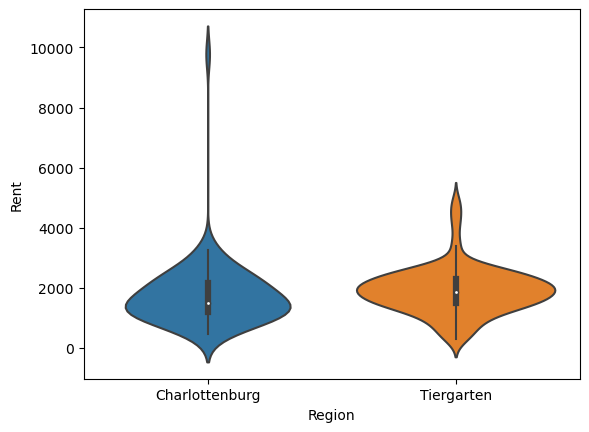

In [28]:
sns.violinplot(data = cheaper_region, x = "Region", y = "Rent")

<Axes: xlabel='Region', ylabel='Rent'>

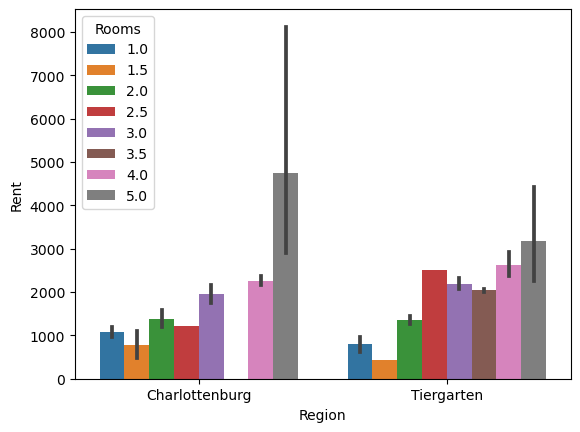

In [29]:
sns.barplot(data = cheaper_region, x = "Region", y = "Rent", hue = "Rooms")

In [30]:
#are flats cheaper in Charlottenburg than in Tiergarten?
rentals.query('Region == "Tiergarten"')["Rent"].mode()

0    1500.0
1    2555.0
Name: Rent, dtype: float64

In [31]:
rentals.query('Region == "Tiergarten"').agg({"Rent":["mean", "median", "max", "min"]})

,Rent
mean,1914.824795
median,1869.560000
max,4945.000000
min,271.250000


In [32]:
rentals.query('Region == "Charlottenburg"').agg({"Rent":["mean", "median", "max", "min"]})

,Rent
mean,1753.452532
median,1498.000000
max,9774.000000
min,478.520000


In [33]:
rentals.query('Region == "Charlottenburg"')["Rent"].mode()

0    1300.0
Name: Rent, dtype: float64

**Conclusion**

The average rent is higher in Tiergarten compared to Charlottenburg

Although the minimum and maximum rent are higher in Charlottenburg, the mode and median rent are higher in Tiergarten 

**Hypothesis 5: Modernized and first time use apartments are the most expensive to rent**

C:\Users\ich\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


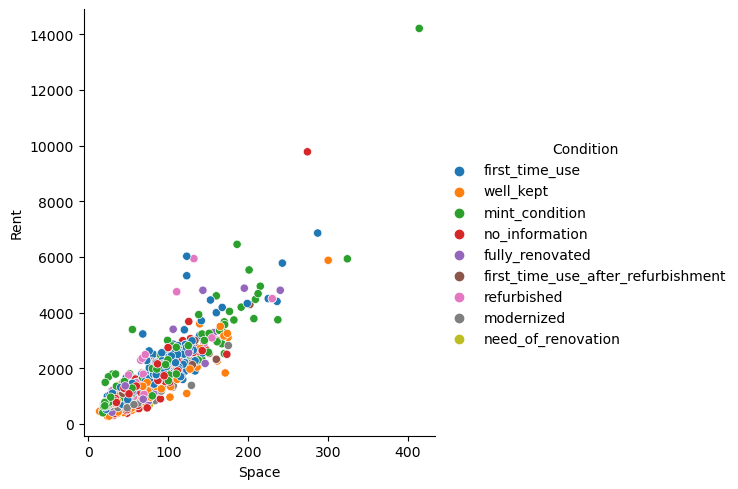

In [34]:
sns.relplot(data=rentals, x ='Space', y='Rent', hue='Condition')
plt.show()

In [35]:
#groupby condition and do some statistics
rentals.groupby('Condition').agg({"Rent": ["mean", "max", "min", "median"]})

Rent                            
                                           mean       max     min    median
Condition                                                                  
first_time_use                      1866.564222   6855.48  525.00  1775.715
first_time_use_after_refurbishment  1925.351944   4288.00  512.93  1887.140
fully_renovated                     1778.308571   4875.00  420.09  1285.000
mint_condition                      2122.196154  14207.00  398.00  1755.000
modernized                          1185.705172   2815.00  577.00  1161.000
need_of_renovation                   612.290000    885.68  433.71   564.885
no_information                      1544.274955   9774.00  311.04  1455.610
refurbished                         2177.256500   5936.40  475.00  1720.680
well_kept                           1217.096979   5876.35  271.25   936.270

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'first_time_use'),
  Text(1, 0, 'well_kept'),
  Text(2, 0, 'mint_condition'),
  Text(3, 0, 'no_information'),
  Text(4, 0, 'fully_renovated'),
  Text(5, 0, 'first_time_use_after_refurbishment'),
  Text(6, 0, 'refurbished'),
  Text(7, 0, 'modernized'),
  Text(8, 0, 'need_of_renovation')])

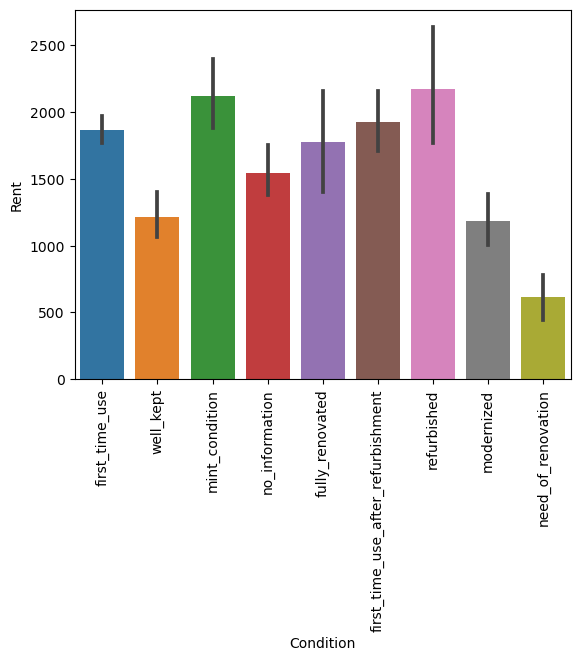

In [36]:
sns.barplot(data=rentals, x="Condition", y="Rent")
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'first_time_use'),
  Text(1, 0, 'well_kept'),
  Text(2, 0, 'mint_condition'),
  Text(3, 0, 'no_information'),
  Text(4, 0, 'fully_renovated'),
  Text(5, 0, 'first_time_use_after_refurbishment'),
  Text(6, 0, 'refurbished'),
  Text(7, 0, 'modernized'),
  Text(8, 0, 'need_of_renovation')])

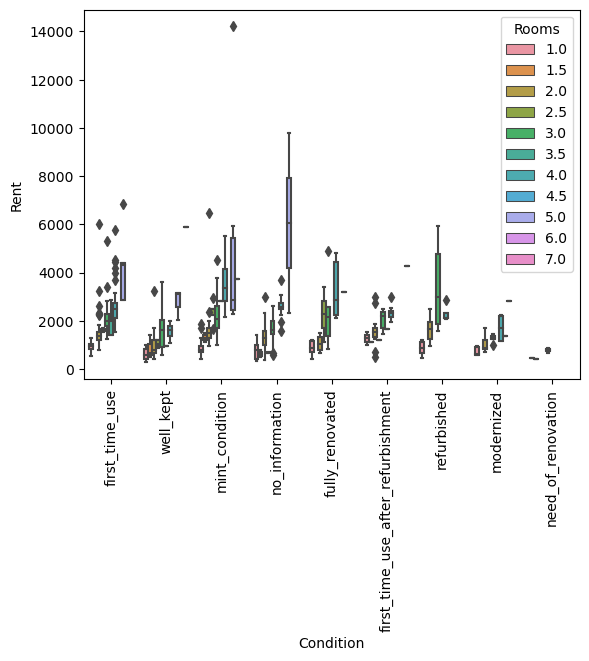

In [37]:
sns.boxplot(data=rentals, x="Condition", y="Rent", hue = "Rooms")
plt.xticks(rotation = 90)

C:\Users\ich\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'first_time_use'),
  Text(1, 0, 'well_kept'),
  Text(2, 0, 'mint_condition'),
  Text(3, 0, 'no_information'),
  Text(4, 0, 'fully_renovated'),
  Text(5, 0, 'first_time_use_after_refurbishment'),
  Text(6, 0, 'refurbished'),
  Text(7, 0, 'modernized'),
  Text(8, 0, 'need_of_renovation')])

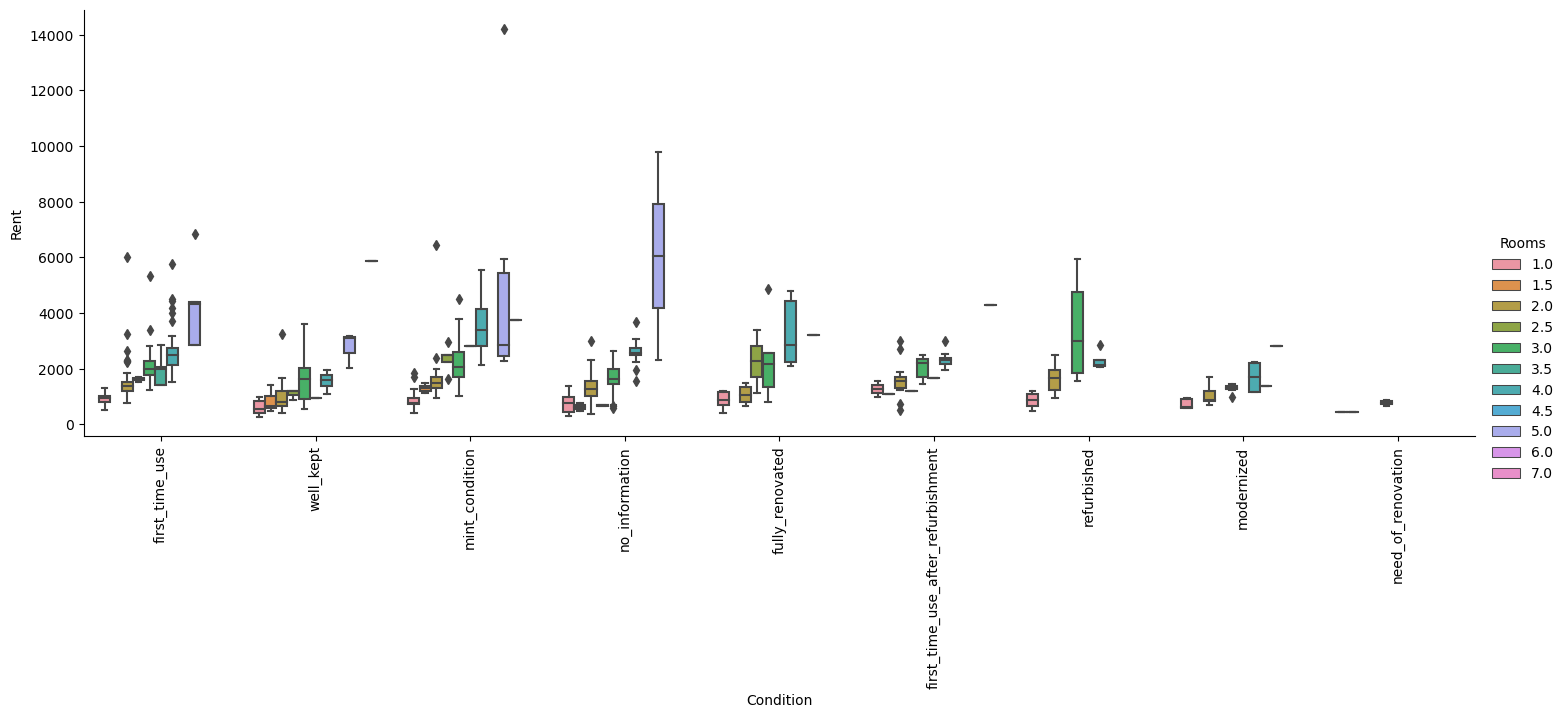

In [38]:
#let's visualize condition and size of an apartment together
sns.catplot(x="Condition", y="Rent", hue="Rooms", kind="box", data=rentals, height=5, aspect=3)
plt.xticks(rotation = 90)

**Conclusion**

Refurbished and apartments in mint conditions are the most expensive on average. 

Modernized apartments are the cheapest on average after those in need of renovation

**Compare modernized and first time use apartments?**

In [39]:
#isolate modernized and first time use apartments
modernized_first = rentals.query('Condition in["modernized", "first_time_use"]')

<Axes: xlabel='Space', ylabel='Rent'>

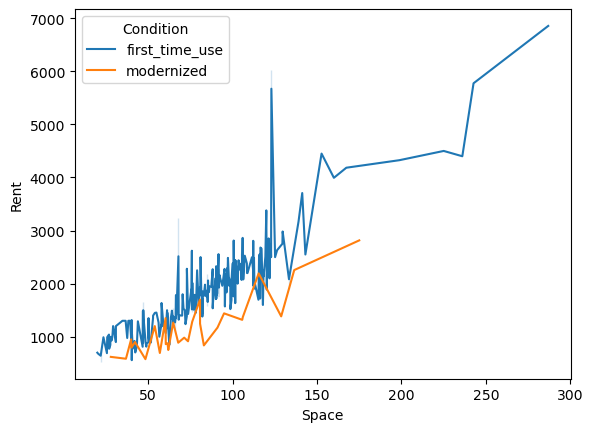

In [40]:
#visualize rent for mordenized and first time use apartments 
sns.lineplot(data = modernized_first, y = "Rent", x = "Space", hue = "Condition")

C:\Users\ich\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


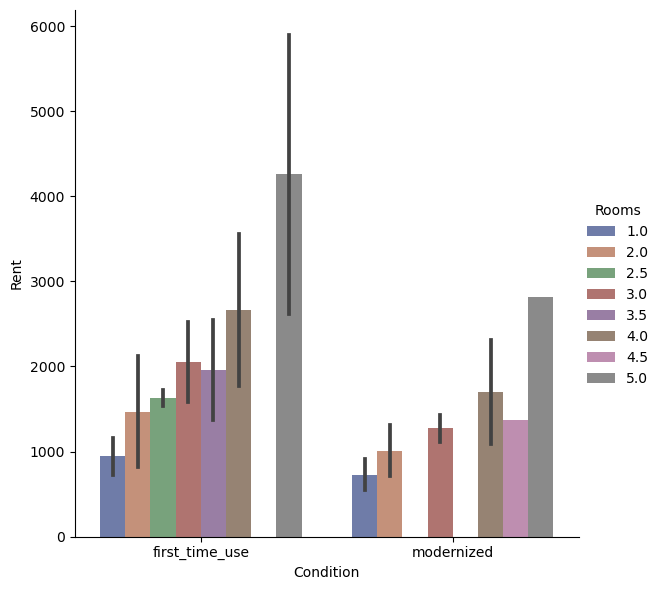

In [41]:
sns.catplot(data=modernized_first, kind="bar",
    x="Condition", y="Rent", hue="Rooms",
    errorbar="sd", palette="dark", alpha=.6, height=6)

The bigger the flat, the higher the price for both apartment conditions

In [42]:
#how many mordenized and first time use apartments are available?
modernized_first["Condition"].value_counts()

Condition
first_time_use    270
modernized         29
Name: count, dtype: int64

In [43]:
modernized_first.groupby("Condition").agg({"Rent":["max", "min", "median", "mean"]})

Rent                              
                    max    min    median         mean
Condition                                            
first_time_use  6855.48  525.0  1775.715  1866.564222
modernized      2815.00  577.0  1161.000  1185.705172

In [44]:
#average, max, min space available for modernized and first time use apartments 
modernized_first.groupby("Condition").agg({"Space":["max", "min", "median", "mean"]})

Space                         
                   max   min  median       mean
Condition                                      
first_time_use  286.84  20.0  83.365  83.966074
modernized      175.00  28.0  71.410  77.064138

In [45]:
#extract only modernized flats
modernized = rentals.query('Condition == "modernized"')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Charlottenburg'),
  Text(1, 0, 'Köpenick'),
  Text(2, 0, 'Tiergarten'),
  Text(3, 0, 'Prenzlauer'),
  Text(4, 0, 'Mitte'),
  Text(5, 0, 'Kreuzberg'),
  Text(6, 0, 'Friedrichsfelde'),
  Text(7, 0, 'Wilmersdorf'),
  Text(8, 0, 'Neukölln'),
  Text(9, 0, 'Wedding')])

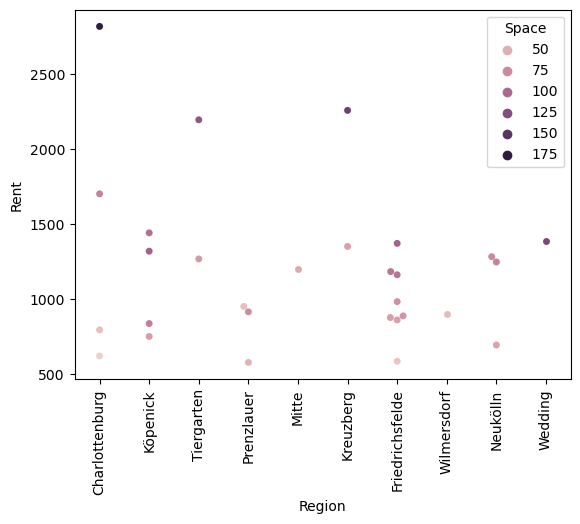

In [46]:
sns.swarmplot(data=modernized, x="Region", y="Rent", hue="Space")
plt.xticks(rotation = 90)

In [47]:
frist_time = rentals.query('Condition == "first_time_use"')

C:\Users\ich\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ich\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Mitte'),
  Text(1, 0, 'Kreuzberg'),
  Text(2, 0, 'Tiergarten'),
  Text(3, 0, 'Friedrichsfelde'),
  Text(4, 0, 'Charlottenburg'),
  Text(5, 0, 'Wilmersdorf'),
  Text(6, 0, 'Neukölln'),
  Text(7, 0, 'Prenzlauer'),
  Text(8, 0, 'Wedding'),
  Text(9, 0, 'Köpenick')])

C:\Users\ich\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


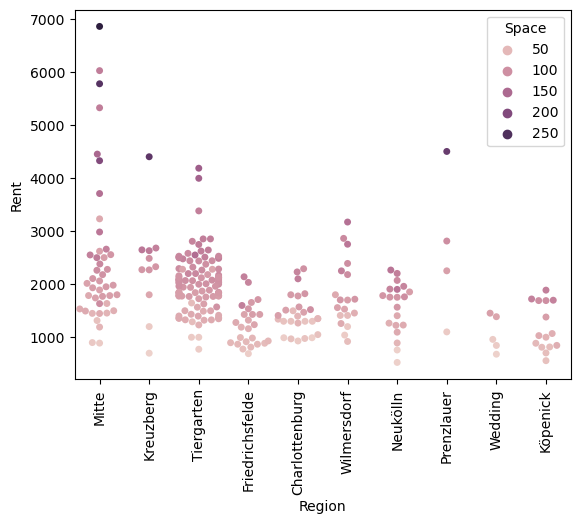

In [48]:
sns.swarmplot(data=frist_time, x="Region", y="Rent", hue="Space")
plt.xticks(rotation = 90)

**Conclusion**

There are only a few modernized apartments available and they have smaller spaces compared to first time use apartments.

